# Математические основы алгоритмов машинного обучения и нейронных сетей.


Обучаем модель с 10 нейронами в скрытом слое...
Epoch 0, Loss: 0.446806
Epoch 100, Loss: 0.244902
Epoch 200, Loss: 0.237370
Epoch 300, Loss: 0.235820
Epoch 400, Loss: 0.234320
Epoch 500, Loss: 0.232313
Epoch 600, Loss: 0.229502
Epoch 700, Loss: 0.225190
Epoch 800, Loss: 0.223010
Epoch 900, Loss: 0.221607


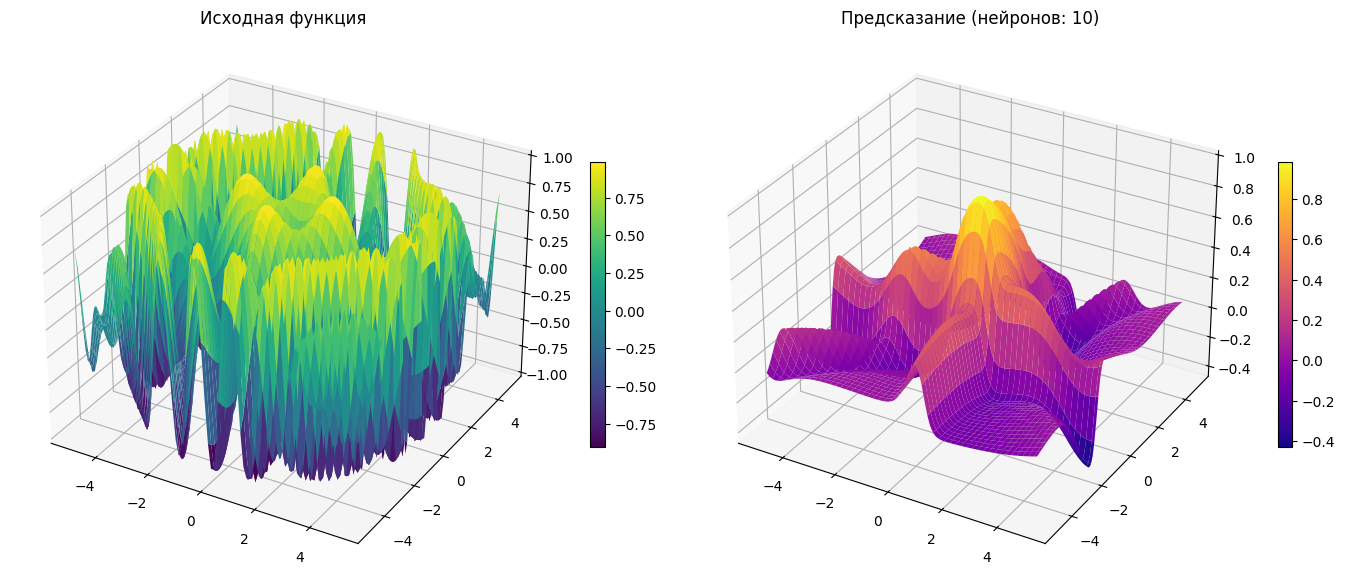


Обучаем модель с 50 нейронами в скрытом слое...
Epoch 0, Loss: 0.676270
Epoch 100, Loss: 0.239162
Epoch 200, Loss: 0.229199
Epoch 300, Loss: 0.221433
Epoch 400, Loss: 0.214289
Epoch 500, Loss: 0.200256
Epoch 600, Loss: 0.187373
Epoch 700, Loss: 0.179418
Epoch 800, Loss: 0.173704
Epoch 900, Loss: 0.168332


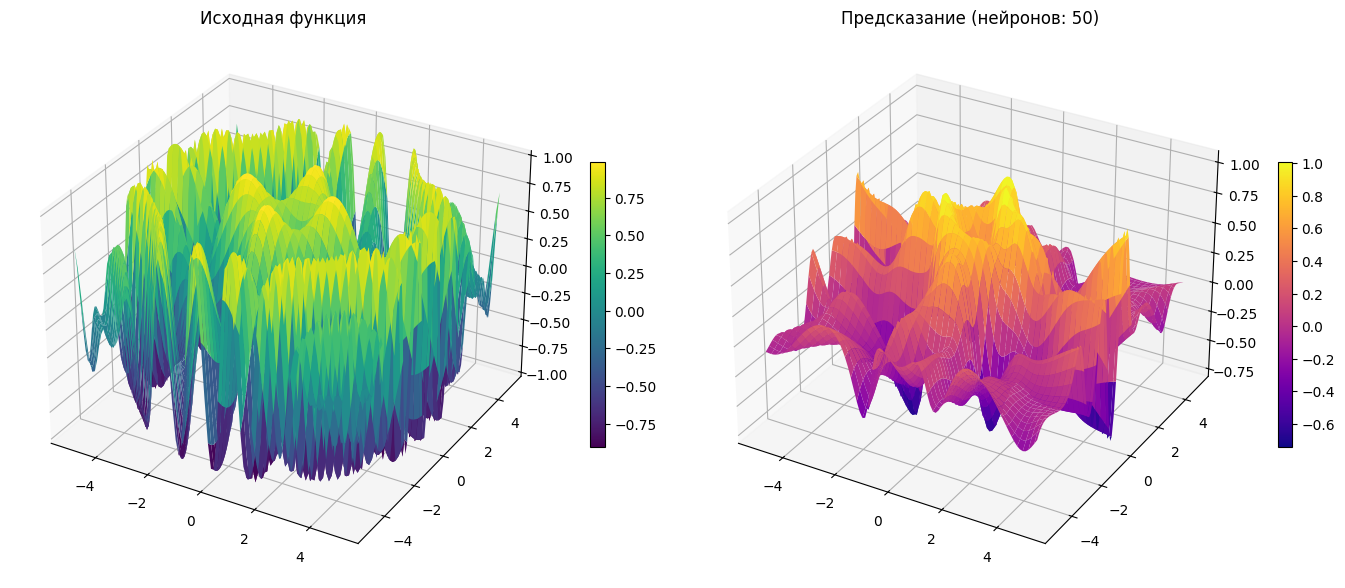


Обучаем модель с 100 нейронами в скрытом слое...
Epoch 0, Loss: 0.481024
Epoch 100, Loss: 0.236421
Epoch 200, Loss: 0.226403
Epoch 300, Loss: 0.215852
Epoch 400, Loss: 0.203071
Epoch 500, Loss: 0.188272
Epoch 600, Loss: 0.175322
Epoch 700, Loss: 0.166552
Epoch 800, Loss: 0.157697
Epoch 900, Loss: 0.150796


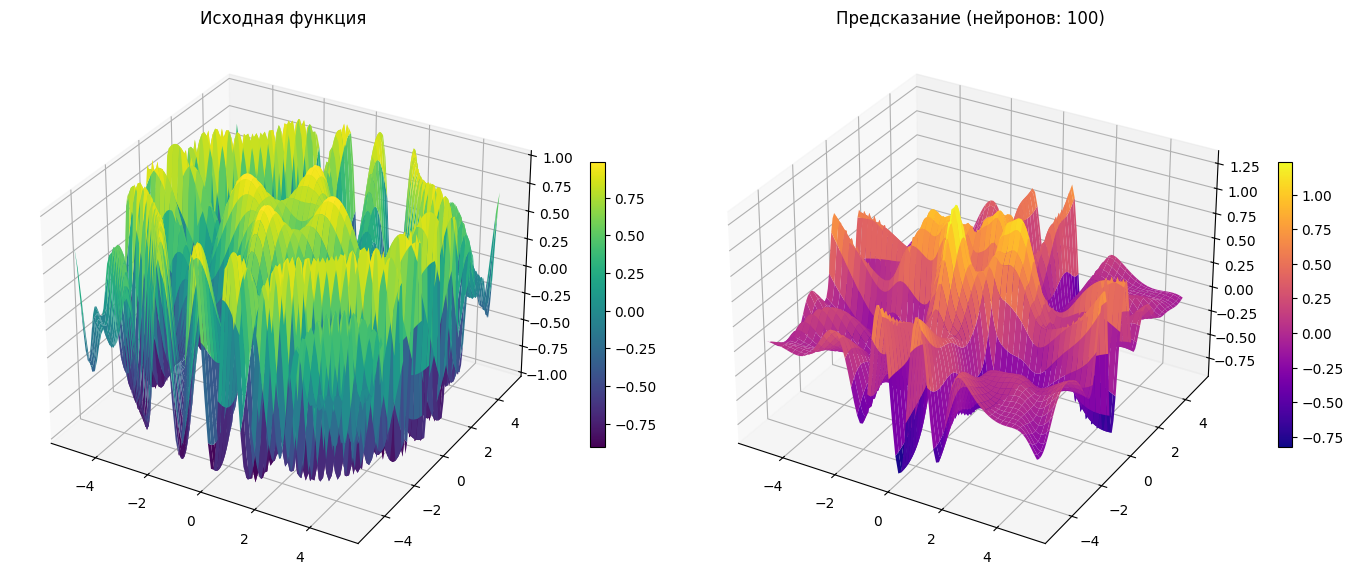

In [9]:
import torch # импорт основной библиотеки PyTorch, отвечающей за тензоры (аналог NumPy-массивов) и вычисления
import torch.nn as nn # содержит классы и функции для построения нейронных сетей (слои, активации и т.д.)
import torch.optim as optim # содержит алгоритмы оптимизации (например, SGD, Adam), которые помогают обучать модель
import numpy as np # numpy для работы с массивами
import matplotlib.pyplot as plt # основной модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # расширение для трехмерных графиков

# создание модели
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size): # hidden_size - количество нейронов скрытого слоя
        super(TwoLayerNet, self).__init__()
        self.hidden = nn.Linear(2, hidden_size) # 2 - количество входных нейронов (x, y)
        self.output = nn.Linear(hidden_size, 1) # 1 - количество выходных нейронов (z)
        self.activation = nn.Tanh() # функция активации - tangh

    # процесс "прямого прохода": как данные проходят через сеть
    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x
    
# функция обучения
def train_model(model, X, Y, epochs=1000, lr=0.01):
    # функция потерь - MSE
    criterion = nn.MSELoss()
    # Adam - алгоритм оптимизации, обновляет веса
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # цикл обучения 
    for epoch in range(epochs):
        model.train()
        pred = model(X)
        loss = criterion(pred, Y)

        # обнуление градиентов
        optimizer.zero_grad()
        # обратное распространение ошибки
        loss.backward()
        # обновление весов
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# целевая функция
def target_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) * np.cos(x*y)

# генерация данных
def generate_data(num_points=1000):
    x = np.random.uniform(-5, 5, num_points)
    y = np.random.uniform(-5, 5, num_points)
    z = target_function(x, y)
    X = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
    Y = torch.tensor(z, dtype=torch.float32).view(-1, 1)
    return X, Y

# функция визуализации
def plot_3d_function(X_train, Y_true, model, title=""):
    x_mesh = np.linspace(-5, 5, 100)
    y_mesh = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_mesh, y_mesh)
    grid = torch.tensor(np.column_stack((X.ravel(), Y.ravel())), dtype=torch.float32)

    with torch.no_grad():
        Z_pred = model(grid).numpy().reshape(X.shape)
    
    Z_true = target_function(X, Y)

    fig = plt.figure(figsize=(14, 6))

    # истинная функция
    ax1 = fig.add_subplot(121, projection='3d')
    surf1 = ax1.plot_surface(X, Y, Z_true, cmap='viridis', edgecolor='none')
    ax1.set_title("Исходная функция")
    plt.colorbar(surf1, ax=ax1, shrink=0.5)

    # предсказание модели
    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(X, Y, Z_pred, cmap='plasma', edgecolor='none')
    ax2.set_title(title)
    plt.colorbar(surf2, ax=ax2, shrink=0.5)

    plt.tight_layout()
    plt.savefig(f'c:/Users/ostas/Pictures/{h}.png', dpi=300, bbox_inches='tight')
    plt.show()

# основной цикл
if __name__ == "__main__":
    X_train, Y_train = generate_data(5000)

    hidden_sizes = [10, 50, 100] # размеры скрытого слоя

    for h in hidden_sizes:
        print(f"\nОбучаем модель с {h} нейронами в скрытом слое...")
        model = TwoLayerNet(h)
        train_model(model, X_train, Y_train, epochs=1000, lr=0.01)
        plot_3d_function(X_train, Y_train, model, title=f"Предсказание (нейронов: {h})")